# MNIST Dataset #

Famoso conjunto de imagens de dígidos manuscritos, dividido em $60000$ imagens de treinamento e $10000$ imagens de teste. Todas as imagens são em escala de cinza com tamanho $28 \times 28$. Existem 10 classes, correspondentes aos dígitos de 0 a 9.

Este dataset está disponível em diversos lugares. Abaixo, vamos usar a versão disponível na biblioteca Keras [1]. Informações adicionais estão disponíveis no [site oficial](http://yann.lecun.com/exdb/mnist/).

In [113]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Vamos visualizar algumas das imagens

label: 5
label: 0
label: 4
label: 1
label: 9
label: 2


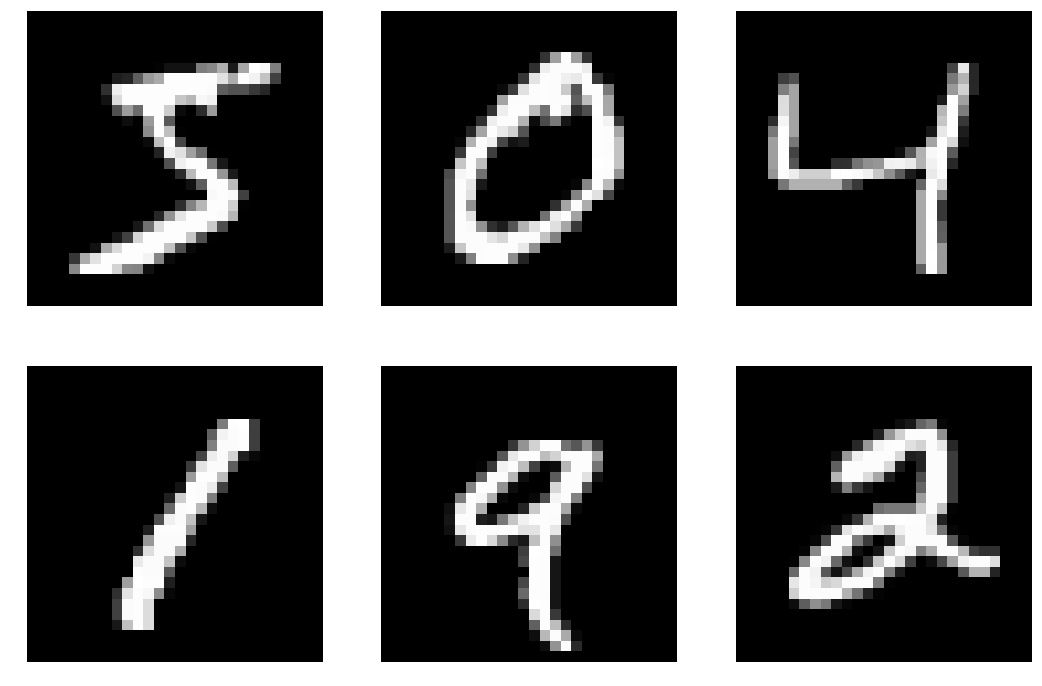

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 3, figsize = (18, 12))

for i in range(6):
    ax[i//3, i%3].imshow(x_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    print('label:', y_train[i])
    
plt.show()

## Pixels $\rightarrow$ Features ##

Agora, aplicamos as funções descritas anteriormente sobre as imagens do MNIST. Note que, na forma de imagens, os dados são representados por $28 \times 28 = 784$ atributos.

In [115]:
import numpy as np
from sklearn.preprocessing import normalize


# Aplica a conversão a todas as entradas do dataset
x_train_features = np.array([image.flatten() for image in x_train])
x_test_features  = np.array([image.flatten() for image in x_test])

x_train_features = normalize(x_train_features, axis = 0, copy = True).ravel()
x_test_features =  normalize(x_test_features, axis = 0, copy = True).ravel()

x_train_features = x_train_features.reshape((60000, 784))
x_test_features = x_test_features.reshape((10000, 784))

print(x_train_features.shape)
print(x_test_features.shape)

(60000, 784)
(10000, 784)


# Selecionando os dados #

Da mesma forma que o exemplo do livro, vamos nos concentrar em identificar os dígitos $0$, $1$, $2$, $3$ e $4$. Vamos juntar os dados com labels 0, 1, 2, 3 e 4, e embaralhar a ordem.

In [116]:
# Antes de mais nada, definir a seed aleatória como uma constante,
# de forma que todos os experimentos obtenham o mesmo resultado
np.random.seed(56789)

x_train_0 = x_train_features[y_train == 0]
x_train_1 = x_train_features[y_train == 1]
x_train_2 = x_train_features[y_train == 2]
x_train_3 = x_train_features[y_train == 3]
x_train_4 = x_train_features[y_train == 4]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]
y_train_2 = y_train[y_train == 2]
y_train_3 = y_train[y_train == 3]
y_train_4 = y_train[y_train == 4]

x_test_0 = x_test_features[y_test == 0]
x_test_1 = x_test_features[y_test == 1]
x_test_2 = x_test_features[y_test == 2]
x_test_3 = x_test_features[y_test == 3]
x_test_4 = x_test_features[y_test == 4]
y_test_0 = y_test[y_test == 0]
y_test_1 = y_test[y_test == 1]
y_test_2 = y_test[y_test == 2]
y_test_3 = y_test[y_test == 3]
y_test_4 = y_test[y_test == 4]

def shuffle(X, y):
    # Com cuidado para embaralhar a entrada e a saída da mesma forma
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]

def shuffleTakeN(X, y, n):
    X, y = shuffle(X, y)
    return X[0:n, :], y[0:n]

x_train_0, y_train_0 = shuffleTakeN(x_train_0, y_train_0, 500)
x_train_1, y_train_1 = shuffleTakeN(x_train_1, y_train_1, 500)
x_train_2, y_train_2 = shuffleTakeN(x_train_2, y_train_2, 500)
x_train_3, y_train_3 = shuffleTakeN(x_train_3, y_train_3, 500)
x_train_4, y_train_4 = shuffleTakeN(x_train_4, y_train_4, 500)

x_train_features = np.concatenate([x_train_0, x_train_1, x_train_2, x_train_3, x_train_4], axis = 0)
y_train = np.concatenate([y_train_0, y_train_1, y_train_2, y_train_3, y_train_4], axis = 0).astype('float32')

x_test_features = np.concatenate([x_test_0, x_test_1, x_test_2, x_test_3, x_test_4], axis = 0)
y_test = np.concatenate([y_test_0, y_test_1, y_test_2, y_test_3, y_test_4], axis = 0).astype('float32')

x_train_features, y_train = shuffle(x_train_features, y_train)

print(x_train_features.shape, y_train.shape)
print(x_test_features.shape, y_test.shape)

(2500, 784) (2500,)
(5139, 784) (5139,)


## SVM ##

O primeiro algoritmo avaliado será o SVM disponivel scikit-learn.

In [117]:
from sklearn import svm
import collections

def accuracy(pred, y):
    correct = 0
    for i in range(len(pred)):
        if (pred[i] == y[i]):
            correct += 1
    return correct/len(pred)

def avg(lst):
    return sum(lst)/len(lst)

def cross_svm(X, Y):
    
    x = [X[0:500], X[500:1000], X[1000:1500], X[1500:2000], X[2000:2500]]
    y = [Y[0:500], Y[500:1000], Y[1000:1500], Y[1500:2000], Y[2000:2500]]
    
    acc_svm = []
    
    clf = svm.SVC(C = 25.0, gamma = 0.45)
        
    print("Cross SVM:\n")
    
    for fold in range(5):
        x_train = np.concatenate([x[i] for i in range(len(x)) if i != fold], axis = 0)  
        y_train = np.concatenate([y[i] for i in range(len(y)) if i != fold], axis = 0).astype('float32')
        
        x_validation = x[fold]
        y_validation = y[fold]
            
        #svm
        clf.fit(x_train, y_train)
        pred = clf.predict(x_validation)    
        acc = accuracy(pred, y_validation)
        acc_svm.append(acc)

        #imprime os dados de cada fold
        if fold == 0:
            print("Fold de validação: Quantidade de exemplos de cada classe; Acurácia")
        
        count_0 = np.count_nonzero(y_validation == 0)
        count_1 = np.count_nonzero(y_validation == 1)
        count_2 = np.count_nonzero(y_validation == 2)
        count_3 = np.count_nonzero(y_validation == 3)
        count_4 = np.count_nonzero(y_validation == 4)
        
        print("Fold %d: " % (fold + 1) + "{0: %d, 1: %d, 2: %d, 3: %d, 4: %d}" % (count_0, count_1, count_2, count_3, count_4) 
              + "; Acurácia = %.4f" % acc)
        
    return avg(acc_svm)

acc_svm = cross_svm(x_train_features, y_train)

print("\nAcurácia Média - SVM: " + "%.4f" % acc_svm)


Cross SVM:

Fold de validação: Quantidade de exemplos de cada classe; Acurácia
Fold 1: {0: 102, 1: 79, 2: 109, 3: 110, 4: 100}; Acurácia = 0.9320
Fold 2: {0: 107, 1: 105, 2: 105, 3: 88, 4: 95}; Acurácia = 0.9360
Fold 3: {0: 115, 1: 97, 2: 87, 3: 106, 4: 95}; Acurácia = 0.9280
Fold 4: {0: 74, 1: 99, 2: 111, 3: 110, 4: 106}; Acurácia = 0.9580
Fold 5: {0: 102, 1: 120, 2: 88, 3: 86, 4: 104}; Acurácia = 0.9600

Acurácia Média - SVM: 0.9428


## MLP ##

O segundo algoritmo avaliado será a rede neural do tipo MLP, disponível no scikit-learn.

In [118]:
from sklearn.neural_network import MLPClassifier
import collections

def cross_mlp(X, Y):
    
    x = [X[0:500], X[500:1000], X[1000:1500], X[1500:2000], X[2000:2500]]
    y = [Y[0:500], Y[500:1000], Y[1000:1500], Y[1500:2000], Y[2000:2500]]
    
    acc_mlp = []
    
    dlf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(2, 5),random_state=1)
    
    print("Cross MLP:\n")
    
    for fold in range(5):
        x_train = np.concatenate([x[i] for i in range(len(x)) if i != fold], axis = 0)  
        y_train = np.concatenate([y[i] for i in range(len(y)) if i != fold], axis = 0).astype('float32')
        
        x_validation = x[fold]
        y_validation = y[fold]
                    
        #mlp        
        dlf.fit(x_train, y_train)
        pred = dlf.predict(x_validation)
        acc = accuracy(pred, y_validation)
        acc_mlp.append(acc)
        
        #imprime os dados de cada fold
        if fold == 0:
            print("Fold de validação - Quantidade de exemplos de cada classe - Acurácia")
        
        count_0 = np.count_nonzero(y_validation == 0)
        count_1 = np.count_nonzero(y_validation == 1)
        count_2 = np.count_nonzero(y_validation == 2)
        count_3 = np.count_nonzero(y_validation == 3)
        count_4 = np.count_nonzero(y_validation == 4)
        
        print("Fold %d: " % (fold + 1) + "{0: %d, 1: %d, 2: %d, 3: %d, 4: %d}" % (count_0, count_1, count_2, count_3, count_4) 
              + "; Acurácia = %.4f" % acc)        
        
    return avg(acc_mlp) 

acc_mlp = cross_mlp(x_train_features, y_train)
print("\nAcurácia Média - MLP: " + "%.4f" % acc_mlp)


Cross MLP:

Fold de validação - Quantidade de exemplos de cada classe - Acurácia
Fold 1: {0: 102, 1: 79, 2: 109, 3: 110, 4: 100}; Acurácia = 0.6900
Fold 2: {0: 107, 1: 105, 2: 105, 3: 88, 4: 95}; Acurácia = 0.8520
Fold 3: {0: 115, 1: 97, 2: 87, 3: 106, 4: 95}; Acurácia = 0.6780
Fold 4: {0: 74, 1: 99, 2: 111, 3: 110, 4: 106}; Acurácia = 0.6840
Fold 5: {0: 102, 1: 120, 2: 88, 3: 86, 4: 104}; Acurácia = 0.7220

Acurácia Média - MLP: 0.7252


## Teste Final ##

Agora escolhemos o algoritmo com melhor desempenho no cross-validation e o treinamos sobre o cojunto de treinamento completo.

In [119]:
print("Acurácias Médias sobre o conjunto de treinamento:\nCross SVM = "  + "%.4f" % acc_svm + ", Cross MLP = " + "%.4f" % acc_mlp + "\n")

if acc_svm > acc_mlp:
    clf = svm.SVC(C = 25.0, gamma = 0.45)
    clf.fit(x_train_features, y_train)
    pred = clf.predict(x_test_features)    
    acc = accuracy(pred, y_test)
    print("Acurácia final com SVM sobre o conjunto de teste = " + "%.4f" % acc)
else:
    dlf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(2, 5),random_state=1)
    dlf.fit(x_train_features, y_train)
    pred = dlf.predict(x_test_features)  
    acc = accuracy(pred, y_test)
    print("Acurácia final com MLP sobre o conjunto de teste = " + "%.4f" % acc)
        

Acurácias Médias sobre o conjunto de treinamento:
Cross SVM = 0.9428, Cross MLP = 0.7252

Acurácia final com SVM sobre o conjunto de teste = 0.9624


## Características do conjunto de teste ##

A seguir vemos a quantidade de exemplos de cada classe no conjunto de teste.

In [120]:
count_0 = np.count_nonzero(y_test == 0)
count_1 = np.count_nonzero(y_test == 1)
count_2 = np.count_nonzero(y_test == 2)
count_3 = np.count_nonzero(y_test == 3)
count_4 = np.count_nonzero(y_test == 4)
print("{0: %d, 1: %d, 2: %d, 3: %d, 4: %d}" % (count_0, count_1, count_2, count_3, count_4))    

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982}


### Matriz de confusão ###
A seguir podemos ver a matriz de confusão obtida usando o algoritmo de maior acurácia. 
(Obs: a função de cálculo e plotagem da matriz de confusão foi obtida no site do scikit-lear, link fonte descrito no código)

Normalized confusion matrix
[[9.93e-01 0.00e+00 2.04e-03 5.10e-03 0.00e+00]
 [0.00e+00 9.70e-01 1.23e-02 1.67e-02 8.81e-04]
 [3.78e-02 9.69e-04 9.26e-01 2.42e-02 1.07e-02]
 [1.09e-02 2.97e-03 2.67e-02 9.54e-01 4.95e-03]
 [1.12e-02 3.05e-03 1.43e-02 2.04e-03 9.69e-01]]


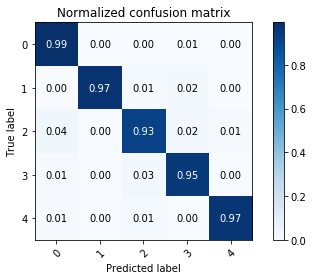

In [122]:
import seaborn as sn
import pandas as pd

#codigo obtido em 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-download-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test.astype('int'), pred.astype('int'), classes=np.array([0, 1, 2, 3, 4]), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

A classificação foi eficiente (>0.9) para todas as classes. Sendo a classe $2$ a que se obteve uma acurácia um pouco menor.

[1]: François Chollet and others, Keras, https://keras.io, 2015

[2]: Yaser S Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin, _Learning from Data_, 2012
